<a href="https://colab.research.google.com/github/Div-raj/PRODIGY_DS_04/blob/main/Task04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline

df=pd.read_csv("/content/twitter_training.csv")
df.head()

2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...

from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('im getting on borderlands and i will murder you all ,').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['2401']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': '2401'}, axis=1)
              .sort_values('2401', ascending=True))
  xs = counted['2401']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('2401', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('im getting on borderlands and i will murder you all ,')):
  _plot_series(series, series_name, i)
  fig.legend(title='im getting on borderlands and i will murder you all ,', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('2401')
_ = plt.ylabel('count()')

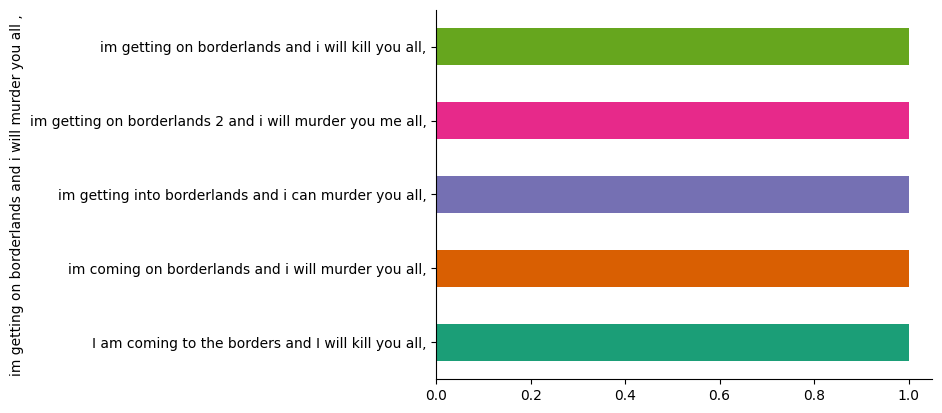

In [45]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('im getting on borderlands and i will murder you all ,').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [46]:
df.rename(columns={'Positive': 'category'}, inplace=True)
df.rename(columns={'im getting on borderlands and i will murder you all ,': 'text'}, inplace=True)
df.shape

(74681, 4)

<ipython-input-47-2124c95c5679>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Borderlands",data=df,palette="turbo")


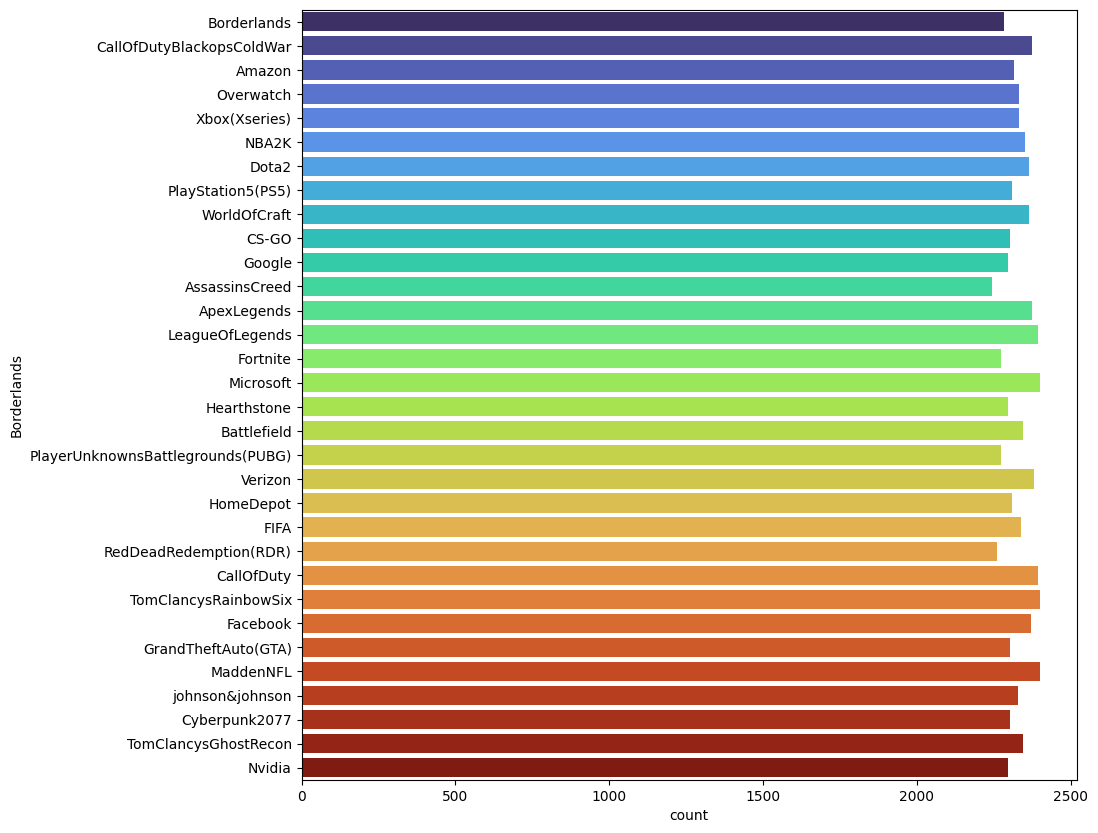

In [47]:
df["Borderlands"].value_counts()
df["2401"].value_counts()
df.isnull().sum()
df["category"].value_counts()
plt.figure(figsize=(10,10))
sns.countplot(y="Borderlands",data=df,palette="turbo")
plt.show()

<ipython-input-48-4c6405ab4506>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="category",data=df,palette="gnuplot")


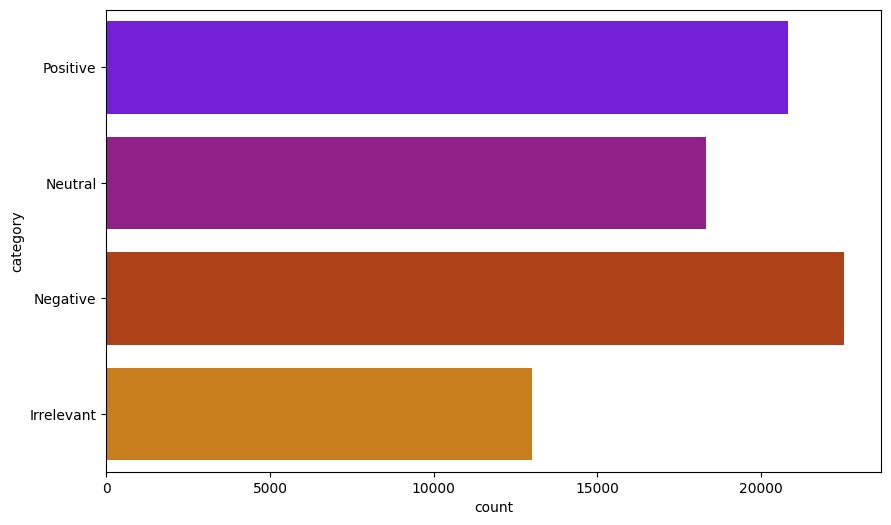

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(y="category",data=df,palette="gnuplot")
plt.show()

In [49]:
df["text"]=df["text"].astype(str)
from wordcloud import WordCloud, STOPWORDS
from bs4 import BeautifulSoup
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

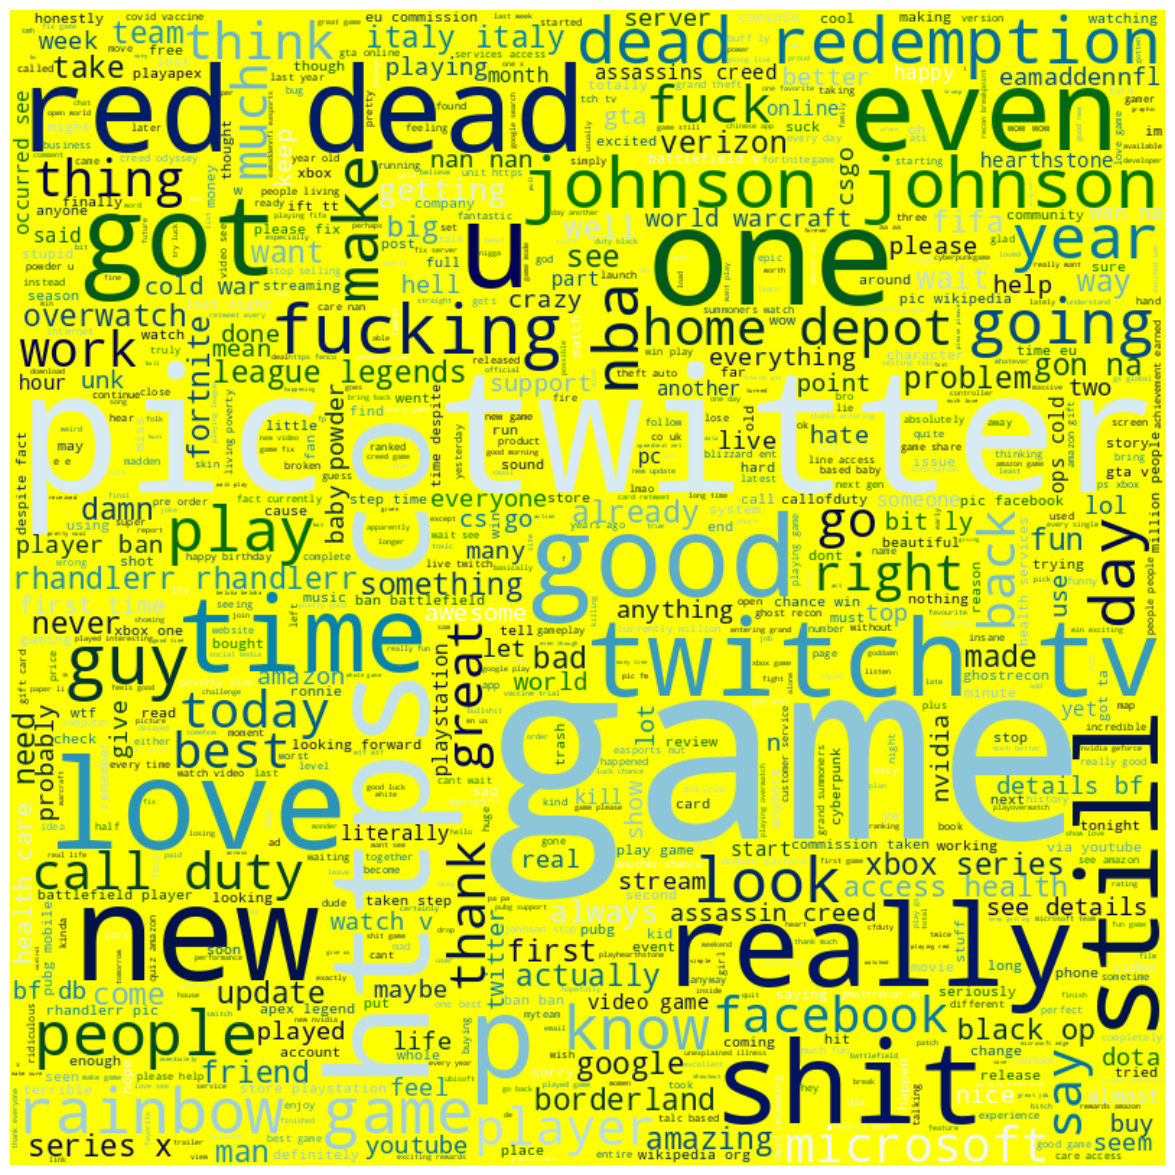

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from bs4 import BeautifulSoup
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Define the clean_text function
def clean_text(text):
    if isinstance(text, str):
        # Remove HTML tags
        text = BeautifulSoup(text, 'html.parser').get_text()
        # Remove non-alphabetic characters and extra spaces
        text = re.sub(r"[^a-zA-Z]", " ", text)
        # Remove punctuation
        text = text.translate(str.maketrans("", "", string.punctuation))
        # Remove emojis
        emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"
                                   u"\U0001F300-\U0001F5FF"
                                   u"\U0001F680-\U0001F6FF"
                                   u"\U0001F1E0-\U0001F1FF"
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   "]+", flags=re.UNICODE)
        text = emoji_pattern.sub(r'', text)
        # Convert to lowercase
        text = text.lower()
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in stop_words]
        text = ' '.join(tokens)
        return text
    else:
        return "done"

# Apply the clean_text function
df["text"] = df["text"].apply(clean_text)

# Create the word cloud
plt.figure(figsize=(15, 15))
all_text = " ".join(df['text'].values.tolist())

# Generate word cloud
wordcloud = WordCloud(width=800, height=800,
                      stopwords=STOPWORDS,
                      background_color='yellow',
                      max_words=800,
                      colormap="ocean").generate(all_text)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



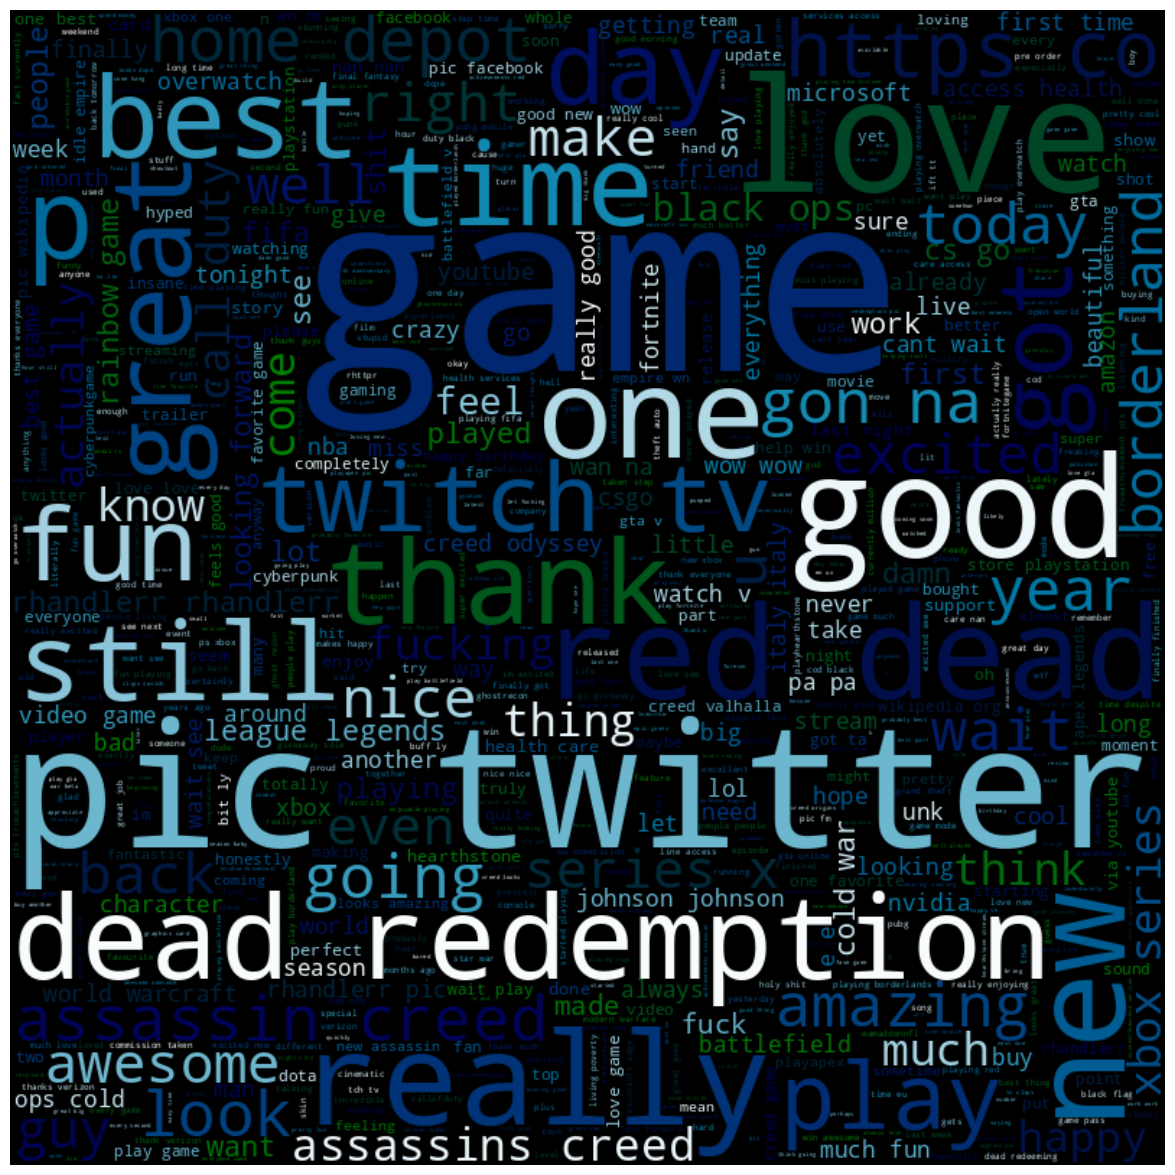

In [57]:
all_text=df[df["category"]=="Positive"]["text"]
plt.figure(figsize=(15,15))
p_text=" ".join(all_text)
wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='black', max_words=800,colormap="ocean").generate(p_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

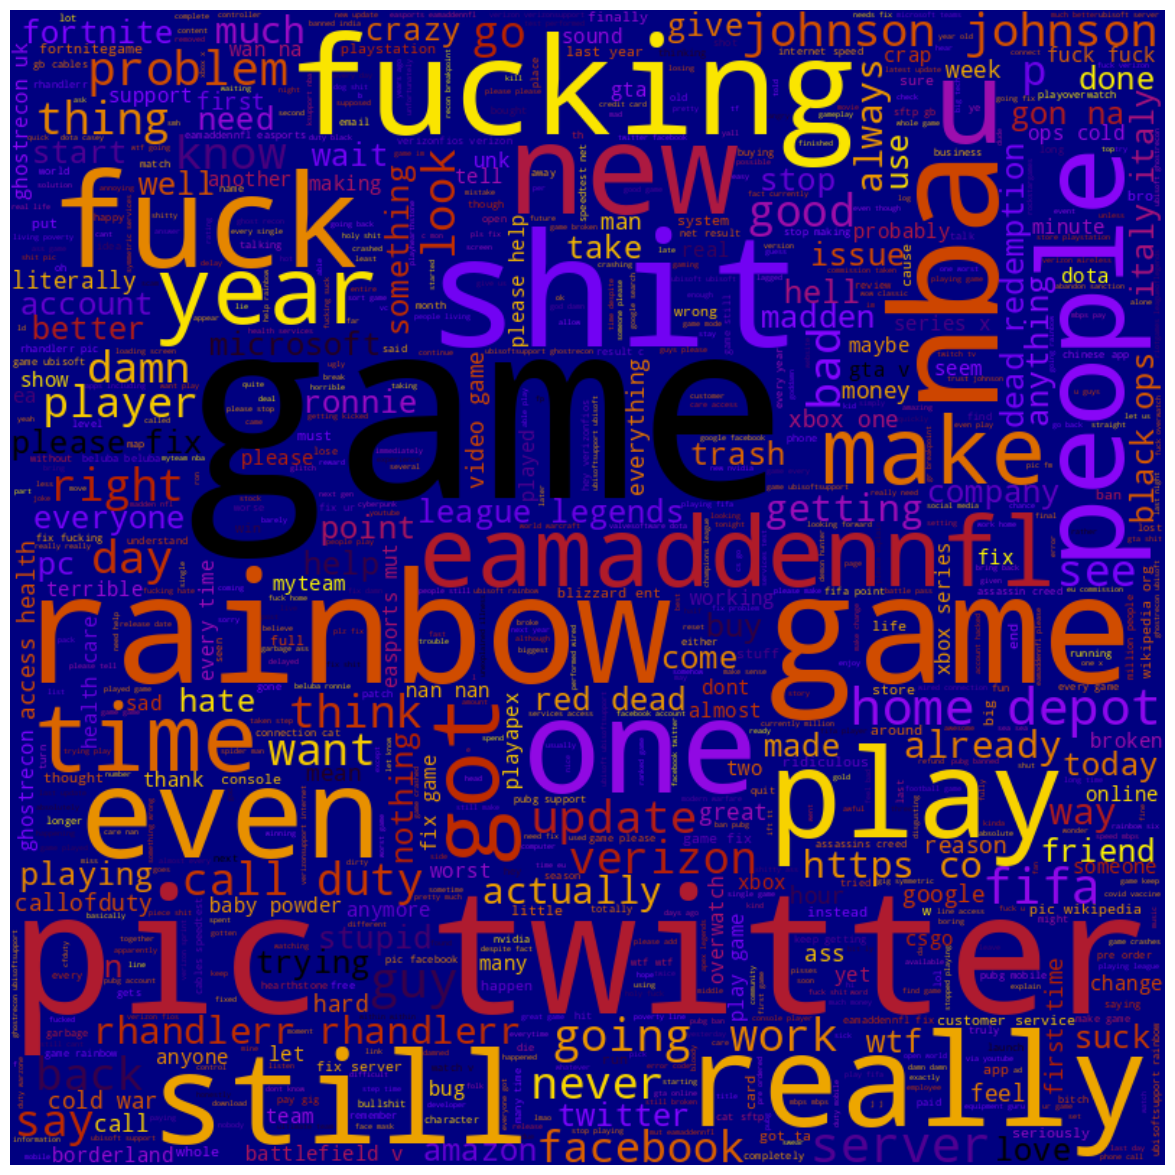

In [58]:
all_text=df[df["category"]=="Negative"]["text"]
plt.figure(figsize=(15,15))
n_text=" ".join(all_text)
wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='navy', max_words=800,colormap="gnuplot").generate(n_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

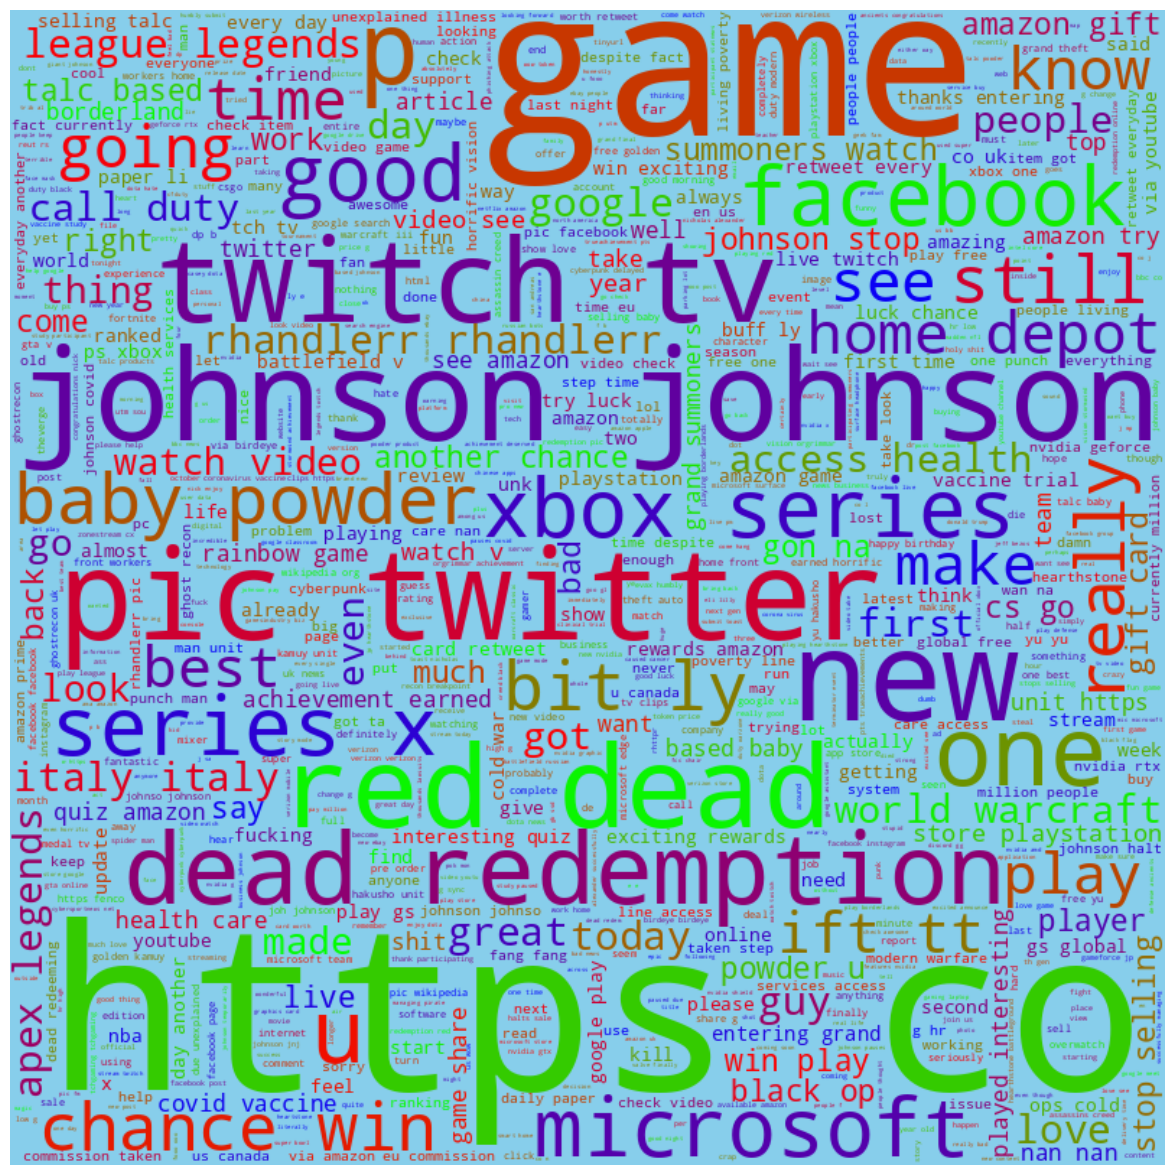

In [59]:
all_text=df[df["category"]=="Neutral"]["text"]
plt.figure(figsize=(15,15))
ne_text=" ".join(all_text)
wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='skyblue', max_words=800,colormap="brg").generate(ne_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

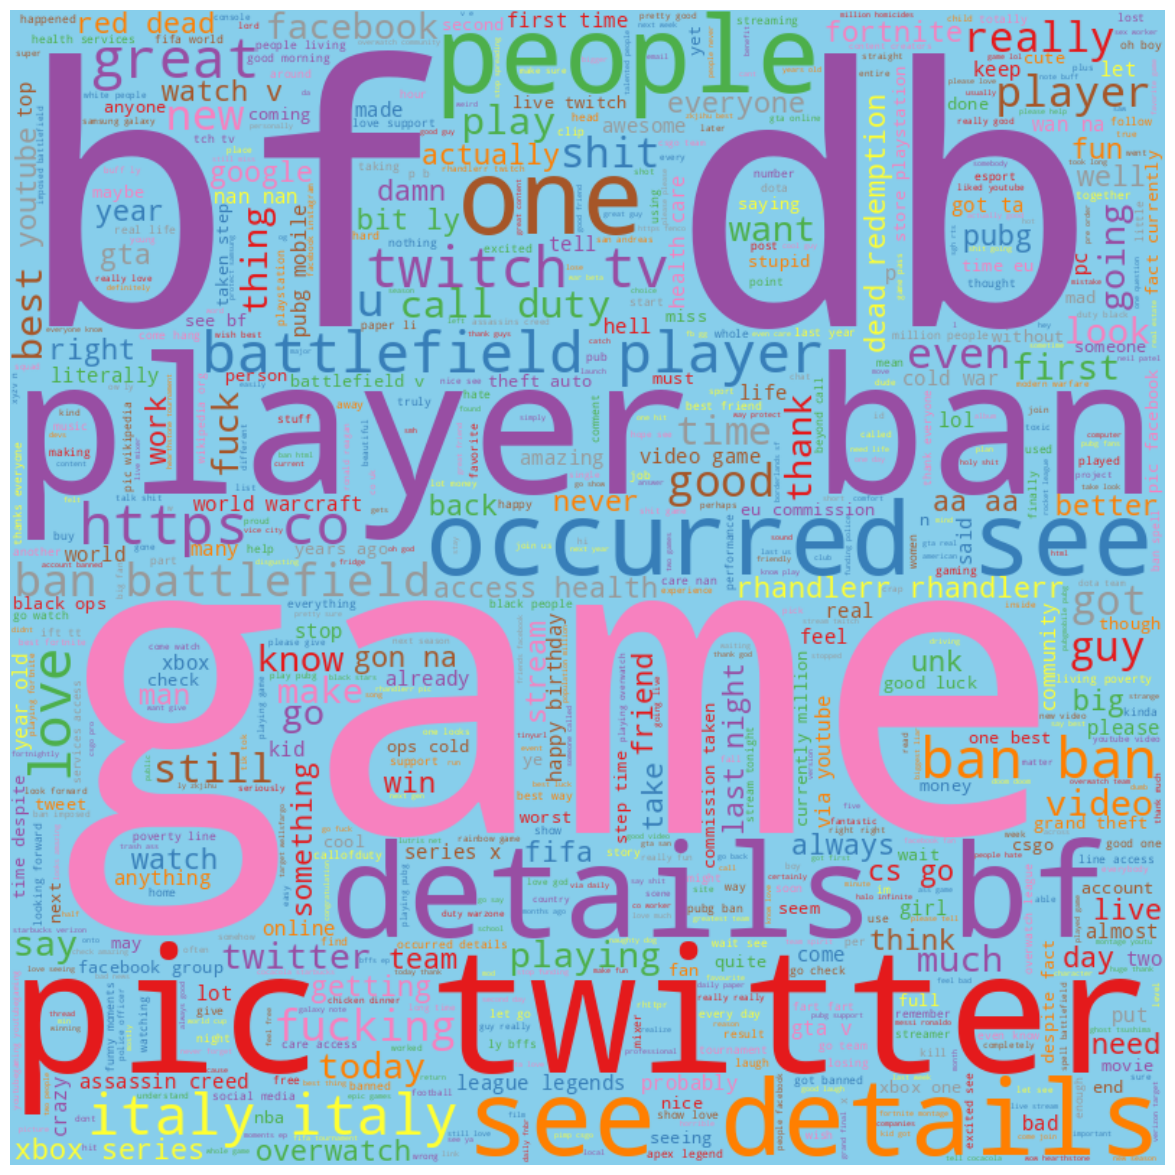

In [60]:
i_text=df[df["category"]=="Irrelevant"]["text"]
plt.figure(figsize=(15,15))
ne_text=" ".join(i_text)
wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='skyblue', max_words=800,colormap="Set1").generate(ne_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

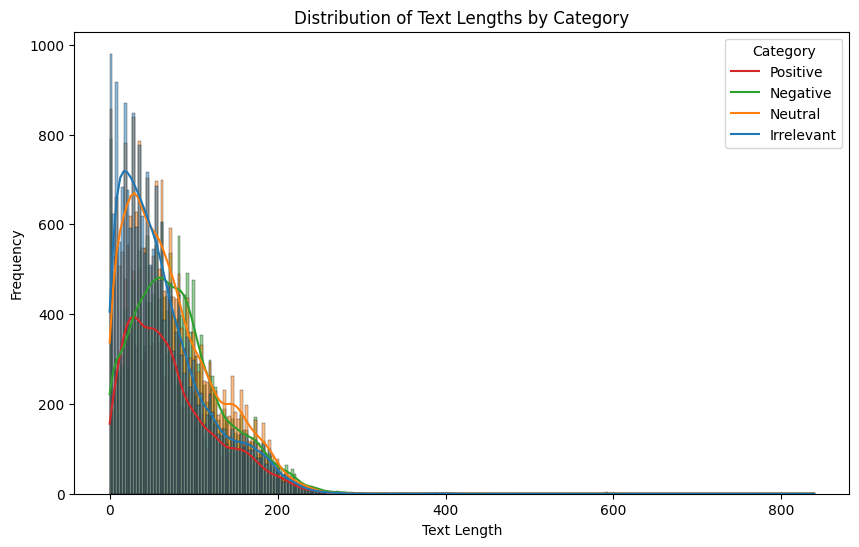

In [61]:
p_len=df[df["category"]=="Positive"]["text"].str.len()
n_len=df[df["category"]=="Negative"]["text"].str.len()
neu_len=df[df["category"]=="Neutral"]["text"].str.len()
irr_len=df[df["category"]=="Irrelevant"]["text"].str.len()
lengths_df = pd.DataFrame({
    "Positive": p_len,
    "Negative": n_len,
    "Neutral": neu_len,
    "Irrelevant": irr_len
})

plt.figure(figsize=(10, 6))
sns.histplot(data=lengths_df, kde=True)
plt.title('Distribution of Text Lengths by Category')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend(title='Category', labels=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
plt.show()

<ipython-input-62-f1e18510e7c5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=df_common_words,palette="Set1")


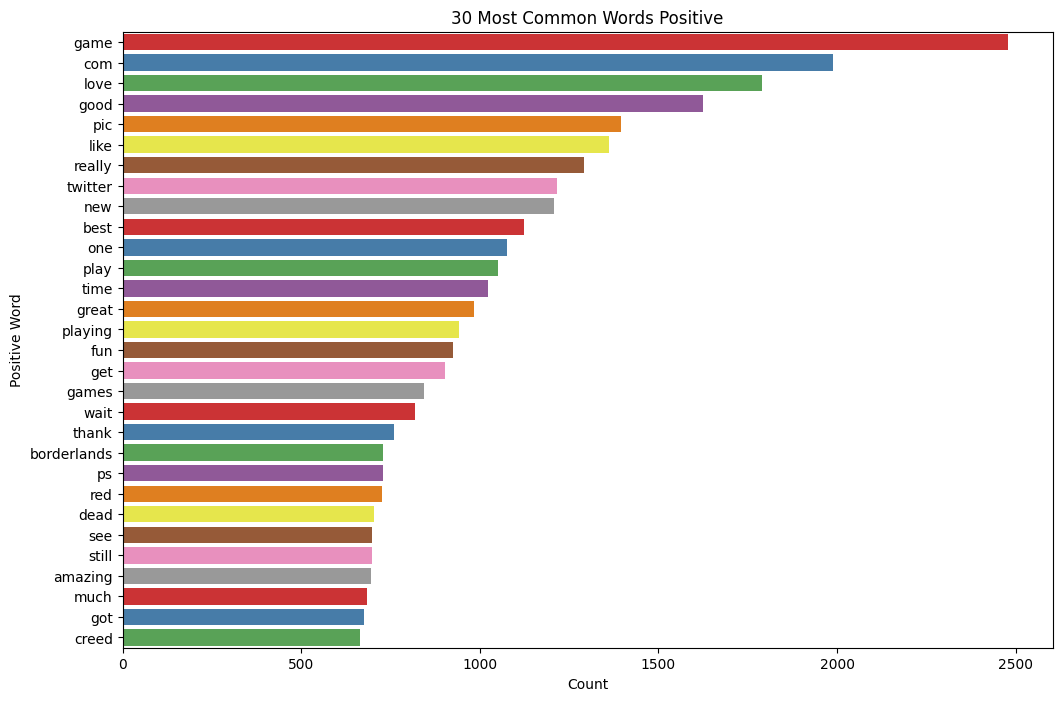

In [62]:
from collections import Counter
pos_text = df[df["category"] == "Positive"]
data_set = pos_text["text"].str.split()
all_words = [word for sublist in data_set for word in sublist]
counter = Counter(all_words)
common_words = counter.most_common(30)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Word', data=df_common_words,palette="Set1")
plt.title('30 Most Common Words Positive')
plt.xlabel('Count')
plt.ylabel('Positive Word')
plt.show()


<ipython-input-63-f05ae5eaa403>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=df_common_words,palette="Set1")


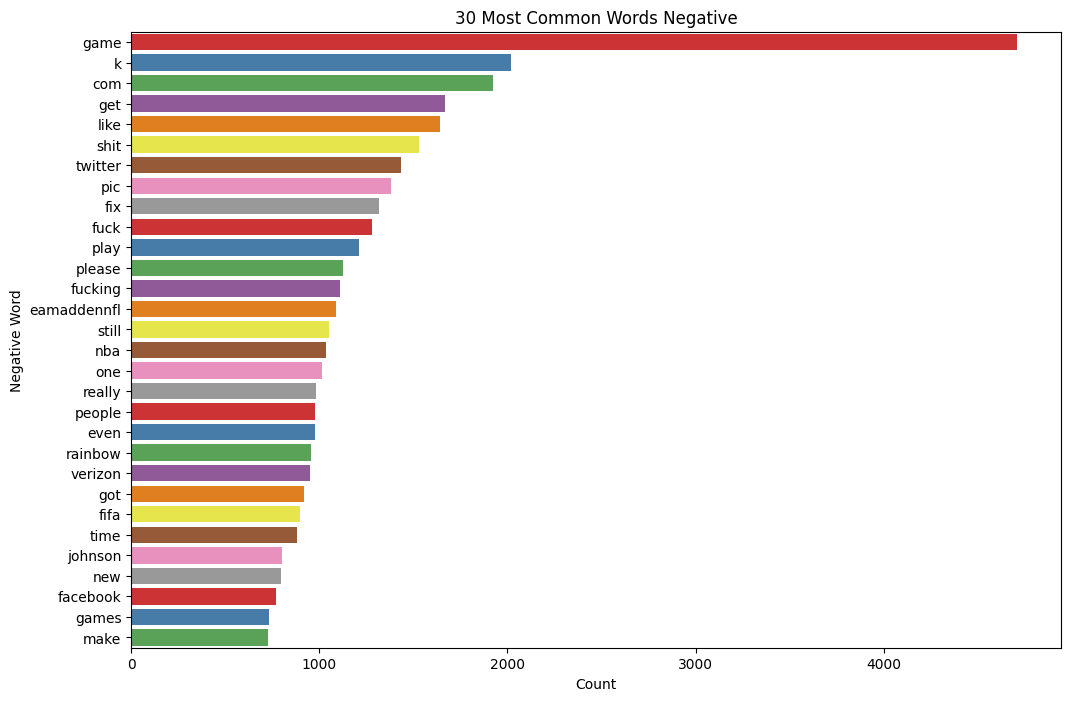

In [63]:
n_text = df[df["category"] == "Negative"]
data_set = n_text["text"].str.split()
all_words = [word for sublist in data_set for word in sublist]
counter = Counter(all_words)
common_words = counter.most_common(30)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Word', data=df_common_words,palette="Set1")
plt.title('30 Most Common Words Negative')
plt.xlabel('Count')
plt.ylabel('Negative Word')
plt.show()

<ipython-input-64-ce7deea0241f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=df_common_words,palette="Set1")


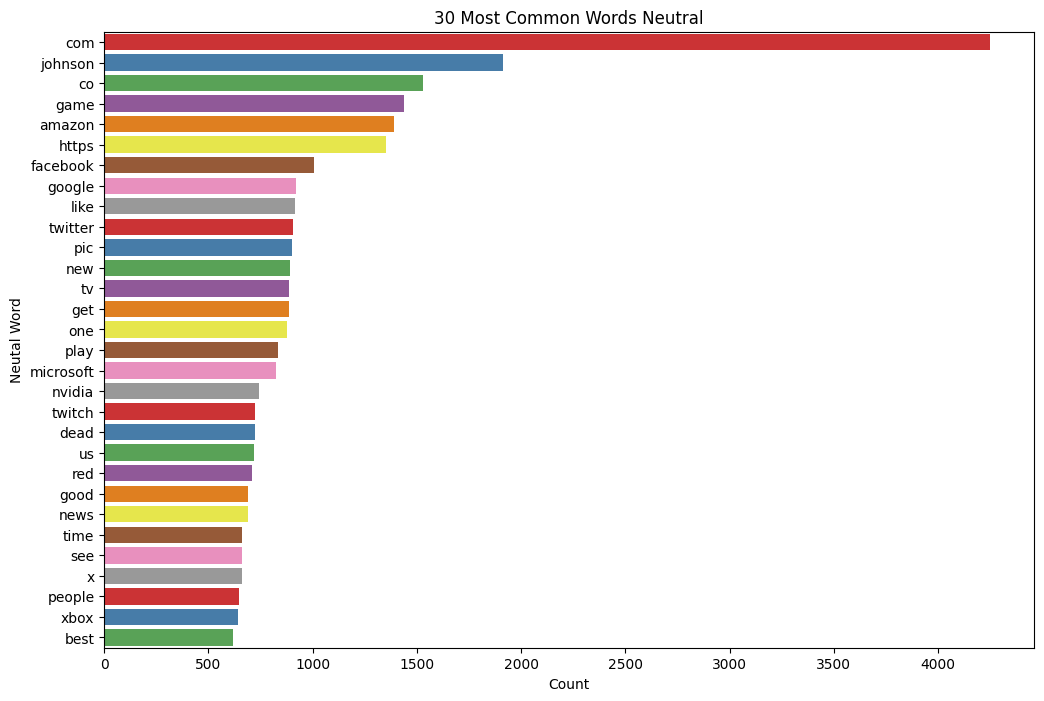

In [64]:
neu_text = df[df["category"] == "Neutral"]
data_set = neu_text["text"].str.split()
all_words = [word for sublist in data_set for word in sublist]
counter = Counter(all_words)
common_words = counter.most_common(30)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Word', data=df_common_words,palette="Set1")
plt.title('30 Most Common Words Neutral')
plt.xlabel('Count')
plt.ylabel('Neutal Word')
plt.show()

<ipython-input-71-151724541944>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=df_common_words,palette="Set1")


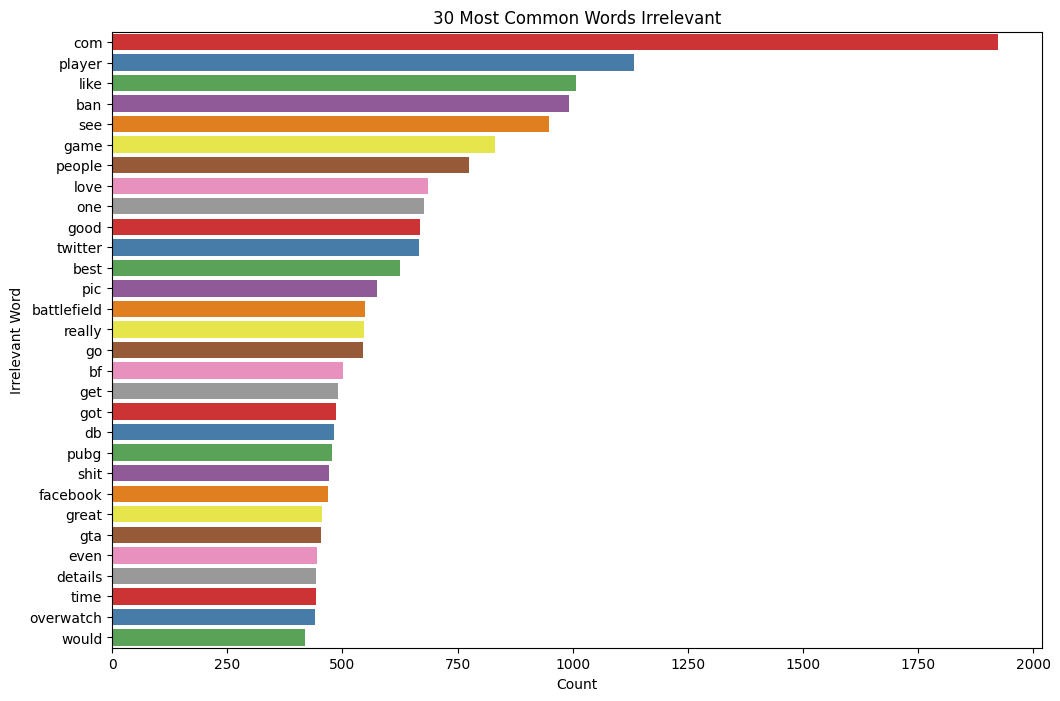

In [71]:
irr_text = df[df["category"] == "Irrelevant"]
data_set = irr_text["text"].str.split()
all_words = [word for sublist in data_set for word in sublist]
counter = Counter(all_words)
common_words = counter.most_common(30)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Word', data=df_common_words,palette="Set1")
plt.title('30 Most Common Words Irrelevant')
plt.xlabel('Count')
plt.ylabel('Irrelevant Word')
plt.show()

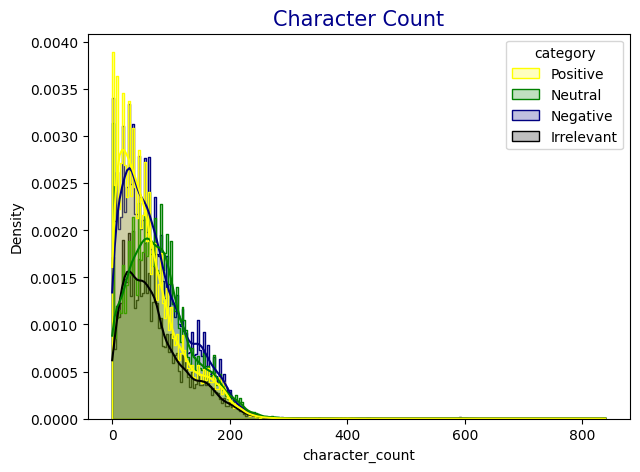

In [69]:
df["character_count"]=df["text"].str.len()
df['word_count'] = df['text'].str.split().str.len()
df['sentence_count'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()
color=["yellow","green","navy","black"]
plt.figure(figsize=(7,5))

sns.histplot(data=df,x="character_count",palette=color,kde=True,hue="category",element="step",stat="density")
plt.title("Character Count",fontsize=15,color="darkblue")
plt.show()

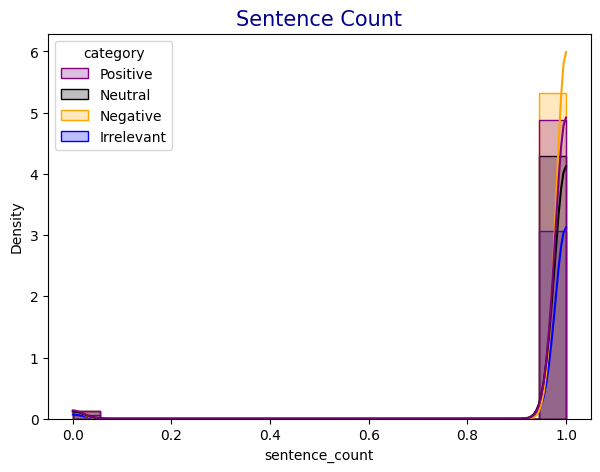

In [70]:
color=["purple","black","orange","blue"]
plt.figure(figsize=(7,5))
sns.histplot(data=df,x="sentence_count",palette=color,kde=True,hue="category",element="step",stat="density")
plt.title("Sentence Count",fontsize=15,color="darkblue")
plt.show()